#### MSDS 422 - Module 4 Assignment 2
# Yue Yu
github: https://github.com/yy383124955/msds422/tree/main/Week%204
## Data overview

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [2]:
# Import data
company = pd.read_csv('data.csv')
# show head of company data
company.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Need to predict SalePrice

In [3]:
# check info of company data
company.info()
# check Summary statistics of company data
company.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## Missing Data

In [4]:
# Find Missing Data
df_missing_data = company.isnull().sum().sort_values(ascending=False)
df_missing_data.head(5)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
dtype: int64

## Find high absolute value correction features

In [5]:
features = company[:96]
features_corr = features.corr()
features_corr

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.586131,-0.542946,-0.574854,-0.381933,-0.381751,-0.598410,-0.618043,-0.616624,-0.431804,...,-0.586035,0.008293,-0.475761,-0.381926,0.153628,0.035985,0.185077,0.045978,NaN,-0.372431
ROA(C) before interest and depreciation before interest,-0.586131,1.000000,0.972051,0.994213,0.271856,0.271545,0.641330,0.665606,0.657750,0.466829,...,0.970770,-0.086671,0.172768,0.271860,-0.692545,0.554939,-0.029753,0.036538,NaN,0.366821
ROA(A) before interest and % after tax,-0.542946,0.972051,1.000000,0.978556,0.249979,0.249713,0.576747,0.662552,0.666265,0.498696,...,0.994587,0.014703,0.141653,0.249987,-0.738915,0.612607,0.009246,0.034990,NaN,0.332761
ROA(B) before interest and depreciation after tax,-0.574854,0.994213,0.978556,1.000000,0.239340,0.239073,0.592470,0.650197,0.651257,0.474785,...,0.975340,-0.072475,0.158885,0.239345,-0.731962,0.593187,-0.018156,0.027444,NaN,0.352450
Operating Gross Margin,-0.381933,0.271856,0.249979,0.239340,1.000000,0.999979,0.682511,0.311505,0.275855,0.007595,...,0.275842,0.017990,0.232043,1.000000,-0.019501,-0.027120,0.062761,-0.090089,NaN,0.084200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.035985,0.554939,0.612607,0.593187,-0.027120,-0.026996,0.068607,0.047282,0.064029,0.020544,...,0.543890,0.064050,-0.218316,-0.027100,-0.924264,1.000000,0.079632,-0.013689,NaN,-0.181441
Degree of Financial Leverage (DFL),0.185077,-0.029753,0.009246,-0.018156,0.062761,0.062839,-0.050327,-0.010822,-0.005237,0.014470,...,0.000426,0.013773,0.011193,0.062773,-0.013517,0.079632,1.000000,0.037302,NaN,-0.129376
Interest Coverage Ratio (Interest expense to EBIT),0.045978,0.036538,0.034990,0.027444,-0.090089,-0.091142,-0.050138,0.085665,0.081086,0.133174,...,0.038262,0.021624,0.024792,-0.090119,0.015761,-0.013689,0.037302,1.000000,NaN,0.069276
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Save to CSV and to find the 
pd.DataFrame(features_corr).to_csv('features-corr.csv')  

In [7]:
# Keep the features with the absoulute value what is higher than 0.3
company = company.drop(company.columns[[11, 14, 21,24,25,26,27,28,29,31,35,39,40,41,44,45,46,47,48,49,50,51,53,55,56,57,59,62,63,64,65,66,67,70,71,72,73,74,75,76,77,78,79,80,81,85,87,90,91,92,93,94]], axis=1)
# show head of the updated company data
company.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Operating Funds to Liability,Retained Earnings to Total Assets,Total income/Total expense,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.334015,0.903225,0.002022,0.520382,0.312905,0.118250,0.716845,0.622879,0.601453,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.341106,0.931065,0.002226,0.567101,0.314163,0.047775,0.795297,0.623652,0.610237,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.336731,0.909903,0.002060,0.538491,0.314515,0.025346,0.774670,0.623841,0.601449,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.348716,0.906902,0.001831,0.604105,0.302382,0.067250,0.739555,0.622929,0.583538,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.344639,0.913850,0.002224,0.578469,0.311567,0.047725,0.795016,0.623521,0.598782,0.035490


## SVM

In [8]:
# Create an X-array and assign it to a variable named x
x = company.loc[:, company.columns != 'Bankrupt?']
# Create an Y-array and assign it to a variable named y
y = company['Bankrupt?']
# Split the data and do a predictive test, 80% training, 20% validation
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [11]:
# Use cross_val_score to evaluate the SVC
cross_val_score(classifier, x_train, y_train, cv=3, scoring="accuracy")

array([0.96646509, 0.96644664, 0.9669967 ])

In [12]:
# Predict Test data
y_pred = classifier.predict(x_test)

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1327,    0],
       [  35,    2]], dtype=int64)

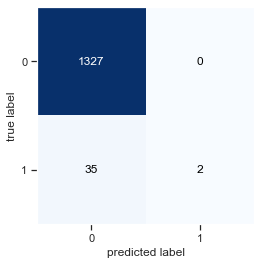

In [14]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [15]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
# Calculate Precision for test data
svm_precision = precision_score(y_test, y_pred)
svm_precision

1.0

In [17]:
# Calculate Recall for test data
svm_recall = recall_score(y_test, y_pred)
svm_recall

0.05405405405405406

In [18]:
# Calculate F1 for test data
svm_f1 = f1_score(y_test, y_pred)
svm_f1

0.10256410256410257

### Find threshold

In [19]:
y_scores = classifier.decision_function(x_test)
y_scores

array([-1.01519044, -1.03372985, -1.02581023, ..., -0.86859356,
       -1.03303655, -1.0067602 ])

In [20]:
threshold = 0
y_x_pred = (y_scores > threshold)
y_x_pred

array([False, False, False, ..., False, False, False])

In [21]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

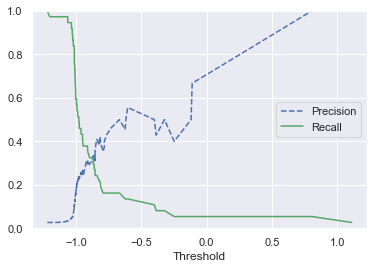

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend()
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

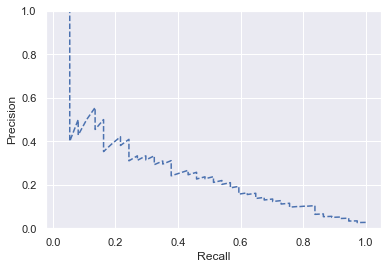

In [23]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b--")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0, 1])
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC


In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

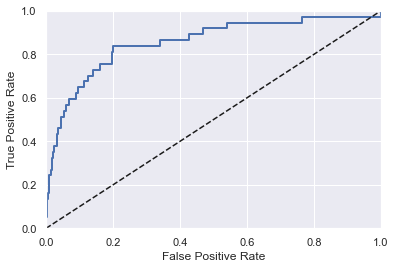

In [25]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [26]:
svm_roc = roc_auc_score(y_test, y_scores)
svm_roc

0.8548239271675594

## Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [28]:
# Use cross_val_score to evaluate the Logistic Regression
cross_val_score(logreg, x_train, y_train, cv=3, scoring="accuracy")

array([0.96646509, 0.96754675, 0.96644664])

In [29]:
# Predict Test data
y_pred = logreg.predict(x_test)

In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1319,    8],
       [  30,    7]], dtype=int64)

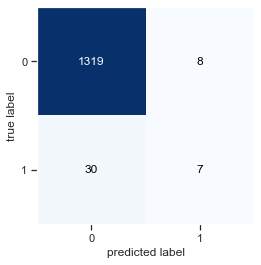

In [31]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [32]:
# Calculate Precision for test data
logreg_precision = precision_score(y_test, y_pred)
logreg_precision

0.4666666666666667

In [33]:
# Calculate Recall for test data
logreg_recall = recall_score(y_test, y_pred)
logreg_recall

0.1891891891891892

In [34]:
# Calculate F1 for test data
logreg_f1 = f1_score(y_test, y_pred)
logreg_f1

0.2692307692307693

### Find threshold 

In [35]:
y_scores = logreg.decision_function(x_test)
y_scores

array([-3.9229954 , -4.98780952, -3.02454305, ..., -1.24506571,
       -7.73596106, -3.82225122])

In [36]:
threshold = 0
y_x_pred = (y_scores > threshold)
y_x_pred

array([False, False, False, ..., False, False, False])

In [37]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

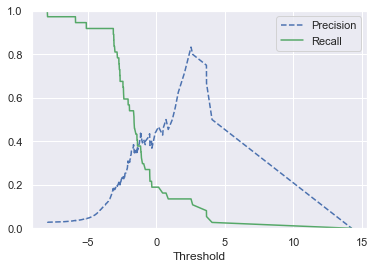

In [38]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

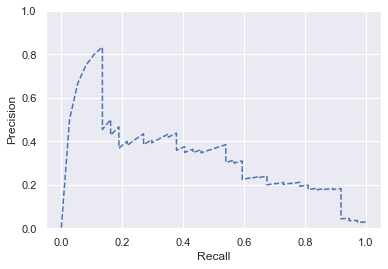

In [39]:
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC 

In [40]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_scores)

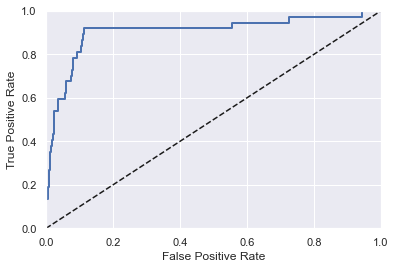

In [41]:
plot_roc_curve(fpr2, tpr2)
plt.show()

In [42]:
log_reg_roc = roc_auc_score(y_test, y_scores)
log_reg_roc

0.9042750361514491

## Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [44]:
# Use cross_val_score to evaluate the Logistic Regression
cross_val_score(logreg, x_train, y_train, cv=3, scoring="accuracy")

array([0.96646509, 0.96754675, 0.96644664])

In [45]:
# Predict Test data
y_pred = nb.predict(x_test)

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[338, 989],
       [  2,  35]], dtype=int64)

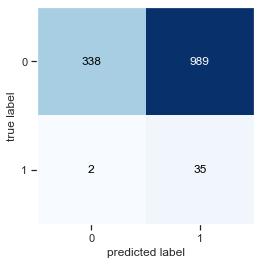

In [47]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [48]:
# Calculate Precision for test data
nb_precision = precision_score(y_test, y_pred)
nb_precision

0.0341796875

In [49]:
# Calculate Recall for test data
nb_recall = recall_score(y_test, y_pred)
nb_recall

0.9459459459459459

In [50]:
# Calculate F1 for test data
nb_f1 = f1_score(y_test, y_pred)
nb_f1

0.06597549481621112

### Find threshold 

In [51]:
y_scores = nb.predict_proba(x_test)
y_scores

array([[2.66068203e-10, 1.00000000e+00],
       [1.27942085e-05, 9.99987206e-01],
       [6.71273868e-14, 1.00000000e+00],
       ...,
       [2.45278571e-24, 1.00000000e+00],
       [5.22472220e-10, 9.99999999e-01],
       [9.19551188e-06, 9.99990804e-01]])

In [52]:
threshold = 0
y_x_pred = (y_scores > threshold)
y_x_pred

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [53]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores[:, 1])

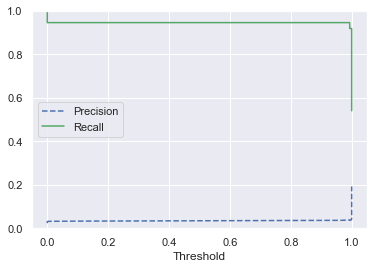

In [54]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

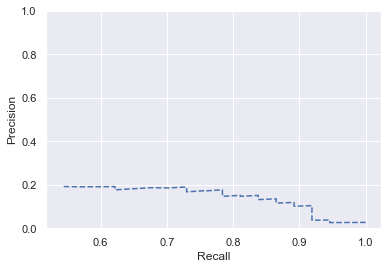

In [55]:
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC 

In [56]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_scores[:, 1])

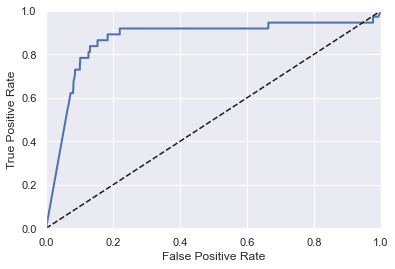

In [57]:
plot_roc_curve(fpr3, tpr3)
plt.show()

In [58]:
nb_roc = roc_auc_score(y_test, y_scores[:, 1])
nb_roc

0.8695594614961609

## Conclusion

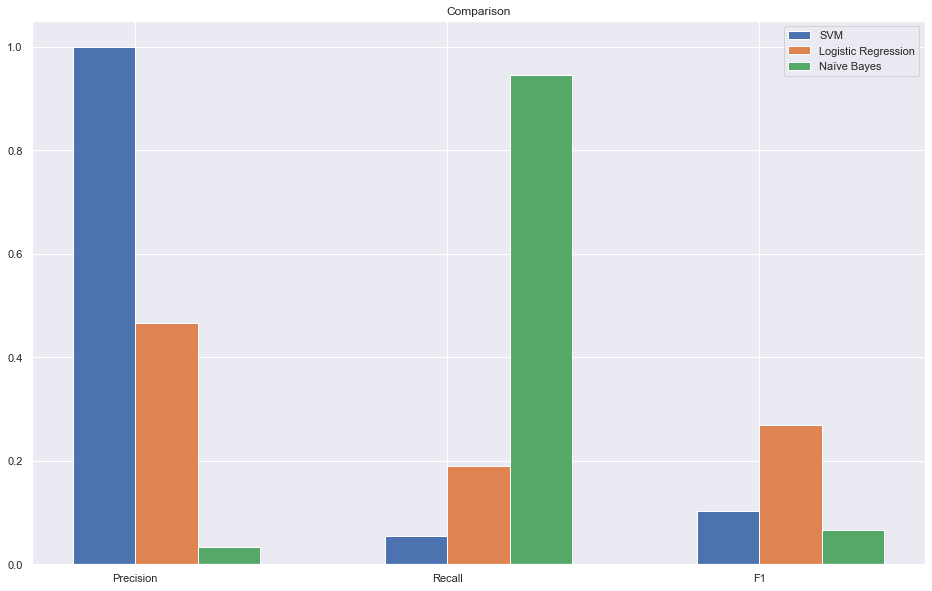

In [78]:
# Comparison of SVM,logistic regression and Naïve Bayes models

fig = plt.figure(figsize=(16,10))
N = 3
svm_rate = (svm_precision, svm_recall, svm_f1)
logreg_rate = (logreg_precision, logreg_recall, logreg_f1)
nb_rate = (nb_precision, nb_recall, nb_f1)

ind = np.arange(N) 
width = 0.2     
plt.bar(ind, svm_rate, width, label='SVM')
plt.bar(ind + width, logreg_rate, width, label='Logistic Regression')
plt.bar(ind + width + width, nb_rate, width, label='Naïve Bayes')


plt.title('Comparison')

plt.xticks(ind + width / 2, ('Precision', 'Recall', 'F1'))
plt.legend(loc='best')
plt.show()

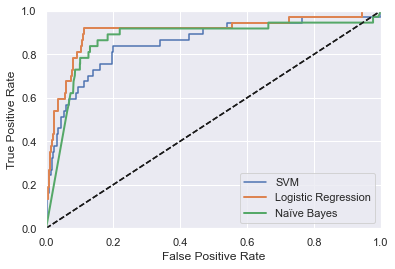

In [79]:
plt.plot(fpr, tpr, label="SVM")
plot_roc_curve(fpr2, tpr2, "Logistic Regression")
plot_roc_curve(fpr3, tpr3, "Naïve Bayes")
plt.legend()
plt.show()

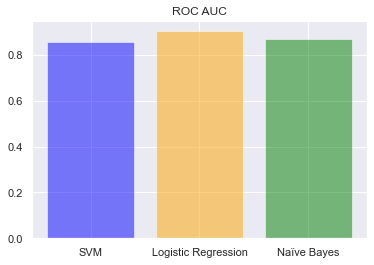

In [81]:
objects = ('SVM', 'Logistic Regression', 'Naïve Bayes')
y_pos = np.arange(len(objects))
performance = [svm_roc,log_reg_roc,nb_roc]

plt.bar(y_pos, performance, color=['blue', 'orange', 'green'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('ROC AUC')

plt.show()

When the default threshold is 0, the three models have different emphases. SVM has the highest Precision but the lowest Recall; Naive Bayes had the highest Recall, but Precision was the lowest; Logistic Regression was medium in both Precision and Recall, but F1 was far ahead. In addition, the ROC curve and ROC AUC of Logistic Regression also performed best. Therefore, if the threshold value remains unchanged, it is my optimal solution to this problem.